In [112]:
#Importing libraries
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [113]:
# Reading the csv file
Data = pd.read_csv('kc_house_data.csv')

In [114]:
# Reviewing some information on the Dataset
Data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [115]:
# The columns of the Dataset
Data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# PreProcessing stage

In [116]:
Data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [117]:
# Cleaning the dataset
Data.isnull().sum()
# No null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [118]:
# Removing the useless columns
Data = Data.drop(['id','date','zipcode'], axis = 1)

In [119]:
# Viewing the columns after editing
Data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [120]:
# Viewing the dataset after editing
Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [121]:
# Converting float columns to int
Data['bathrooms'] = Data['bathrooms'].astype('int32')
Data['price'] = Data['price'].astype('int32')
Data['floors'] = Data['floors'].astype('int32')

## Feature Selection


In [122]:
print(Data.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      1.749734   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.734873    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.000000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.000000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.000000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.446213      0.007542      0.234303      3.409430      7.656873   
std        0.551894      0.086517      0.766318    

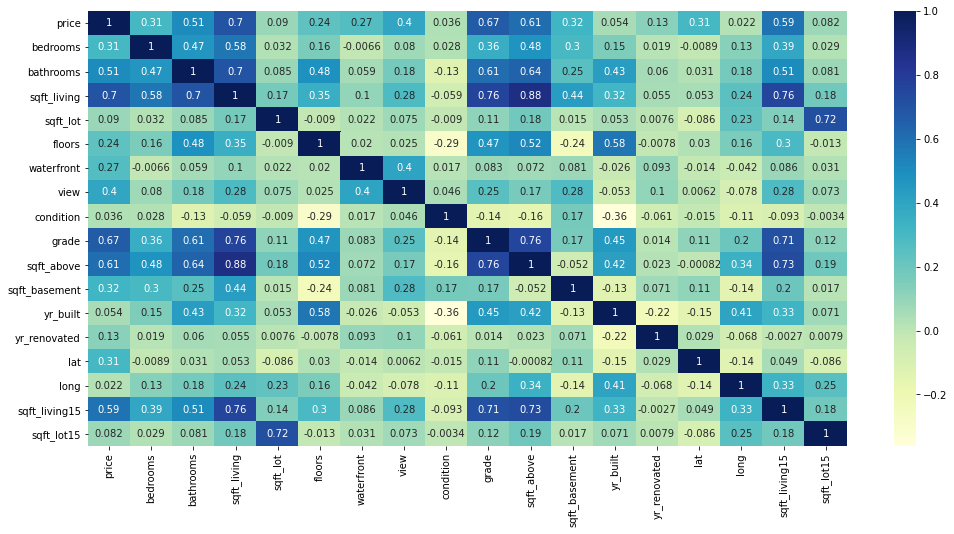

In [123]:
# Correlation heat map to select our features
plt.figure(figsize = (17,8))
dataplot = sns.heatmap(Data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Based on the correalation heat map we will use our features :

X Features -> sqft_living, sqft_above, grade 
Y -> price 
We will predict the price of the house (y) based on our features (X)


## Linear regression model

In [124]:
# X and y for our model
X = Data.loc[:,['sqft_living']]
y = Data.loc[:,'price']

In [125]:
X

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [126]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int32

In [127]:
# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=40)

In [128]:
X_train.shape

(14696, 1)

In [129]:
y_train.shape

(14696,)

In [130]:
X_test.shape

(6917, 1)

In [131]:
y_test.shape

(6917,)

In [132]:
# Model training and predicting
# Linear regression model
Model = LinearRegression() # Building the model
Model.fit(X_train,y_train) # Fitting X and y training data
Predicted = Model.predict(X_test) # Testing the model

print("MSE", mean_squared_error(y_test,Predicted))
print("R squared", metrics.r2_score(y_test,Predicted))

MSE 63871123819.45982
R squared 0.5009440377216858


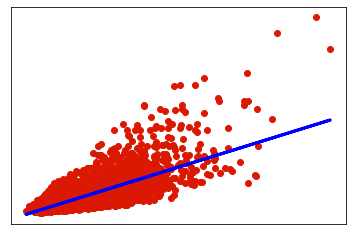

In [133]:
# Plotting the linear regression
plt.scatter(X_test,y_test,  color='#db1802')
plt.plot(X_test, Predicted, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Multilinear regression model 

In [171]:
Data.set_index(Data['grade'], inplace = True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7 to 7
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int32  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int32  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  int32  
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: float64

In [237]:
# extract x and y from our data
X = Data[['sqft_living', 'sqft_above', 'grade']]
y = Data["price"]

In [239]:
X.shape

(21613, 3)

In [238]:
y.shape

(21613,)

In [241]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=40)

In [243]:
# Model training and predicting
# MultiLinear regression model
Model = LinearRegression() # Building the model
Model.fit(X_train,y_train) # Fitting X and y training data
Predicted = Model.predict(X_test) # Testing the model

print("MSE", mean_squared_error(y_test,Predicted))
print("R squared", metrics.r2_score(y_test,Predicted))

MSE 57397656554.769165
R squared 0.5515243663877218


The multilinear regression model performed better than the linear regression model 
The MSE value decreased and the R squared value increased


## Polynomial regression model

In [244]:
from sklearn.preprocessing import PolynomialFeatures 

In [245]:
X = Data[['sqft_living', 'sqft_above', 'grade']]
y = Data["price"]

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=40)

In [252]:
lg = LinearRegression()
poly = PolynomialFeatures(degree = 3)

In [253]:
X_train_fit = poly.fit_transform(X_train)
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
Predicted = lg.predict(X_test_)

In [254]:
print("MSE", mean_squared_error(y_test,Predicted))
print("R squared", metrics.r2_score(y_test,Predicted))

MSE 51594113031.48163
R squared 0.596870257056956


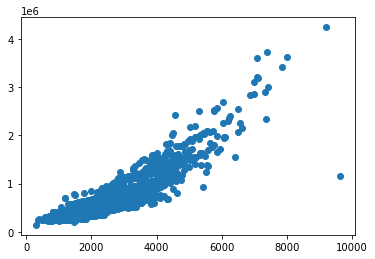

In [255]:
plt.scatter(X_test['sqft_living'], Predicted)